# Лабораторная работа №1
### Тема: ГИСТОГРАММА И ГИСТОГРАММНАЯ ОБРАБОТКА. ПОЭЛЕМЕНТНАЯ ОБРАБОТКА ИЗОБРАЖЕНИЙ. ФИЛЬТРАЦИЯ ИЗОБРАЖЕНИЙ
### Вариант №4
### Группа: 150503
### Авторы: Кулакович Даниил, Лукашонок Антон

### Импортируем библиотеки

In [1]:
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np

### Подключение Google Drive


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Подключение папки с изображениями
Примечание: создайте в вашем Google диске ярлык на папку '02 Фигурки'

In [3]:
%cd '/content/drive/MyDrive/02. Фигурки'
%ls

/content/drive/.shortcut-targets-by-id/1rRqcylgRuZneaDjIFOBju4HAgXiHjmHu/02. Фигурки
1695128011374.jpg  1695138157743.jpg  1695138157776.jpg  1695138157805.jpg
1695128011387.jpg  1695138157752.jpg  1695138157785.jpg  1725544579789.jpg
1695138157734.jpg  1695138157765.jpg  1695138157794.jpg


### Вспомогательные функции

In [4]:
kernel_sobel = np.array(
    [
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]
    ]
)

kernel_sobel2 = np.array(
    [
        [-1, -2, -1],
        [0, 0, 0],
        [1, 2, 1]
    ]
)

kernel_sharp = np.array(
    [
        [-1,-1,-1],
        [-1,9,-1],
        [-1,-1,-1]
    ]
)

kernel_sharp2 = np.array(
    [
        [0, -1, 0],
        [-1, 5, -1],
        [0, -1, 0]
    ]
)

def load_images():
    images = []
    images_names = [f for f in os.listdir('.') if os.path.isfile(f)]
    for name in images_names:
        images.append(cv2.cvtColor(cv2.imread(name), cv2.COLOR_BGR2RGB))
    return images

def show_images(images, gray=False):
    for image in images:
        if gray == True:
            plt.imshow(image, cmap='gray')
        else:
            plt.imshow(image)
        plt.axis("off")
        plt.show()

def threshold(image, threshold=128):
    return np.uint8(np.where(image >= threshold, image, 0))

def binarization(image, threshold=128):
    return np.uint8(np.where(image >= threshold, 255, 0))

def interval(image, thresh_range=(110, 120)):
    return np.uint8(np.where((image >= thresh_range[0]) & (image < thresh_range[1]), image, 0))

def gap(image, thresh_range=(110, 120)):
    return np.uint8(np.where((image <= thresh_range[0]) | (image > thresh_range[1]), image, 0))

def contrast(input_img, brightness = 0, contrast = 0):
    if brightness != 0:
        if brightness > 0:
            shadow = brightness
            highlight = 255
        else:
            shadow = 0
            highlight = 255 + brightness
        alpha_b = (highlight - shadow)/255
        gamma_b = shadow

        buf = cv2.addWeighted(input_img, alpha_b, input_img, 0, gamma_b)
    else:
        buf = input_img.copy()

    if contrast != 0:
        f = 131*(contrast + 127)/(127*(131-contrast))
        alpha_c = f
        gamma_c = 127*(1-f)

        buf = cv2.addWeighted(buf, alpha_c, buf, 0, gamma_c)

    return buf

def negative(image):
    return 255 - image

### Загрузка изображений

In [5]:
images = load_images()

### Исходные изображения

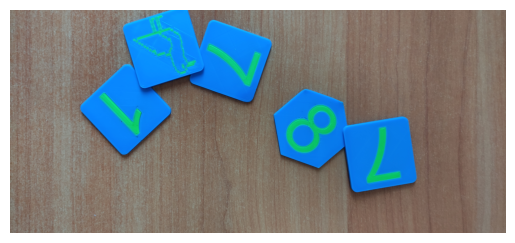

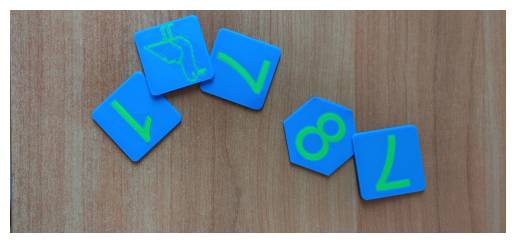

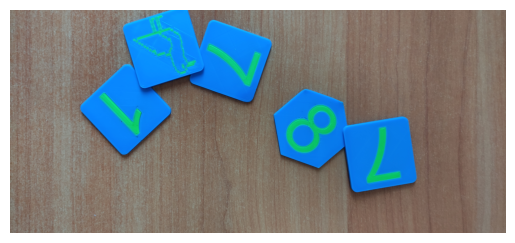

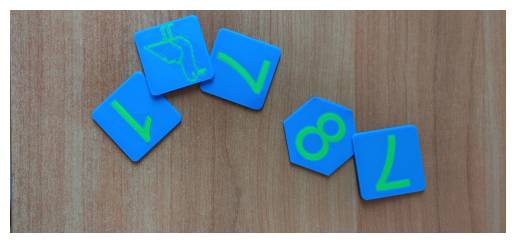

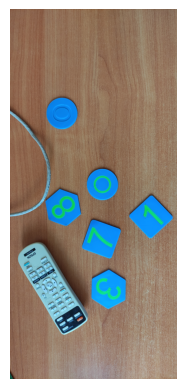

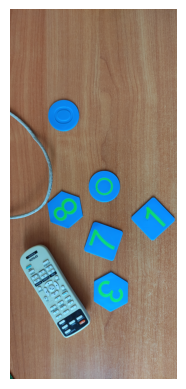

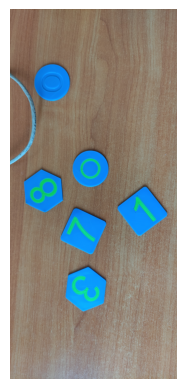

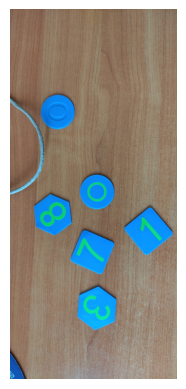

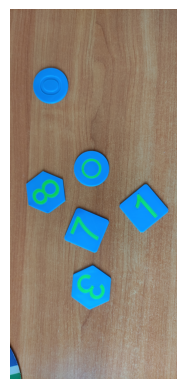

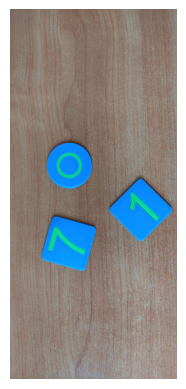

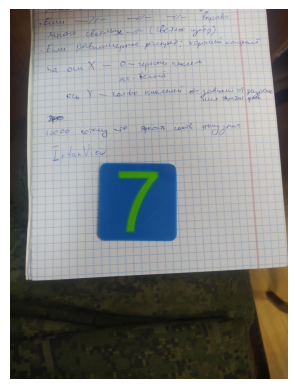

In [6]:
show_images(images)

### Подготовка изображений

In [7]:
dataset = images
#dataset = [images[10], images[4]]
processed_images = dataset

processed_images = [cv2.cvtColor(i, cv2.COLOR_RGB2HSV) for i in processed_images]
upr = np.array([225, 255, 255])
lwr = np.array([100, 170, 110])
masks = [cv2.inRange(i, lwr, upr) for i in processed_images]
processed_images = [cv2.bitwise_and(processed_images[i], processed_images[i], mask=val) for i, val in enumerate(masks)]
processed_images = [cv2.cvtColor(i, cv2.COLOR_HSV2RGB) for i in processed_images]

# show_images(masks, gray=True)
# show_images(processed_images)

processed_images = [cv2.filter2D(i, -1, kernel_sharp) for i in processed_images]
processed_images = [cv2.filter2D(i, -1, kernel_sharp) for i in processed_images]

processed_images = [cv2.cvtColor(i, cv2.COLOR_RGB2GRAY) for i in processed_images]
# processed_images = [cv2.GaussianBlur(i, (3, 3), 5) for i in processed_images]

processed_images = [cv2.medianBlur(i, 35) for i in processed_images]
# processed_images = [threshold(i, 20) for i in processed_images]

# show_images(processed_images, gray=True)

### Гистограммы полутоновых изображений

In [8]:
# for i in grayscaled_images:
#     plt.hist(i)
#     plt.show()

### Фильтр с использованием оператора Собеля

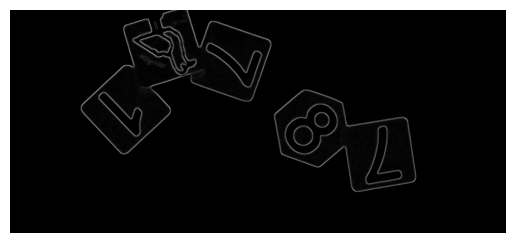

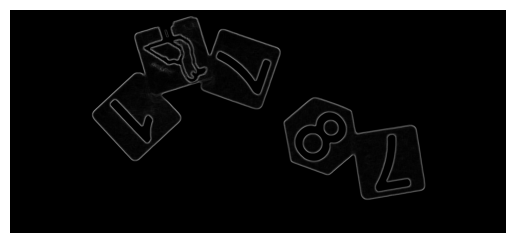

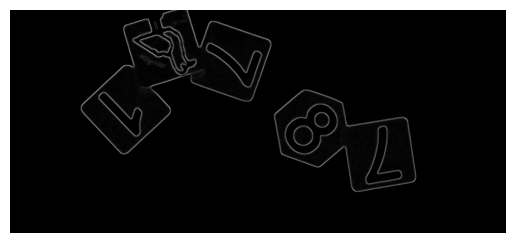

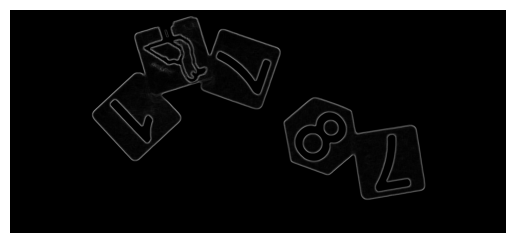

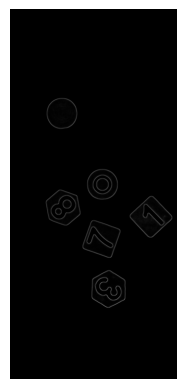

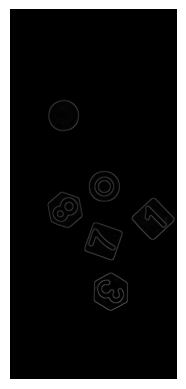

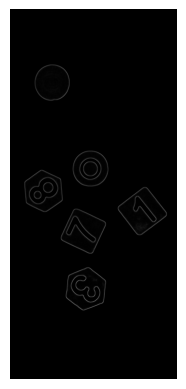

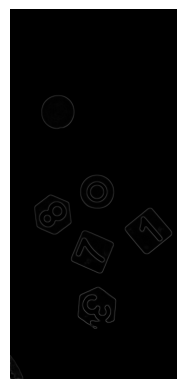

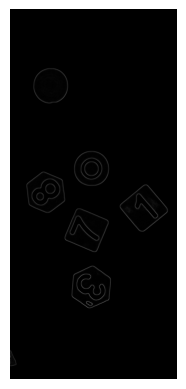

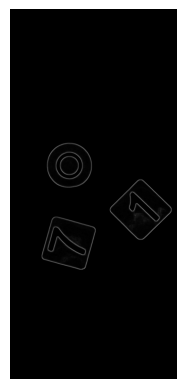

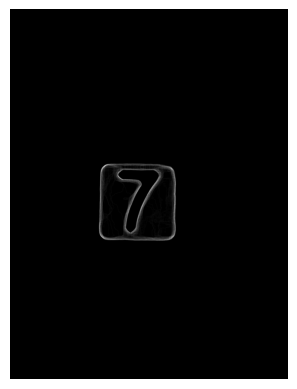

In [9]:
x = [cv2.Sobel(i, cv2.CV_16S, 1, 0, ksize=3, scale=1) for i in processed_images]
y = [cv2.Sobel(i, cv2.CV_16S, 0, 1, ksize=3, scale=1) for i in processed_images]
absx = [cv2.convertScaleAbs(_x) for _x in x]
absy = [cv2.convertScaleAbs(_y) for _y in y]
edges = [cv2.addWeighted(absx[i], 0.5, absy[i], 0.5, 0) for i in range(len(absx))]
# result = [cv2.bitwise_and(dataset[i], dataset[i], mask=edges[i]) for i in range(len(dataset))]
# show_images(result, gray=True)
show_images(edges, gray=True)